In [1]:
from urllib.request import urlretrieve

italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1b1675e04d0>)

In [32]:
import pandas as pd

covid_df = pd.read_csv('italy-covid-daywise.csv')

covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

covid_df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].mean()

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1185.800000,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


<Axes: xlabel='date'>

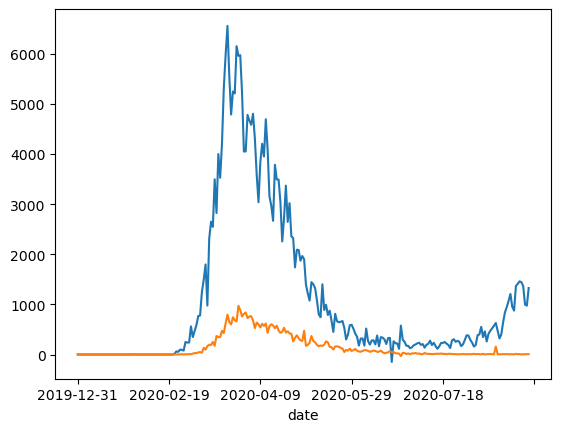

In [50]:
from urllib.request import urlretrieve


urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

locations_df = pd.read_csv('locations.csv')

covid_df['location'] = 'Italy'

merged_df = covid_df.merge(locations_df, on='location')

result_df = merged_df[['date',
                       'new_cases', 
                       'new_deaths', 
                       'new_tests',
                       'location'
                       ]]

result_df.set_index('date', inplace=True)

result_df['new_cases'].plot()
result_df['new_deaths'].plot()